In [17]:
import json
import pandas as pd

# 파일 로드
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return json.load(f)

# 데이터 로드
file_2020 = '../data/title/results/2020.json'
file_2023 = '../data/title/results/2023.json'
data_2020 = load_json(file_2020)
data_2023 = load_json(file_2023)

In [18]:
# 데이터 프레임 생성
def create_dataframe(data, year):
    df = pd.DataFrame(data)
    df = df[['quarter', 'sentiment_responses']]

    # 새 컬럼 score 추가하여 숫자로 변환된 값 저장
    df['score'] = pd.to_numeric(df['sentiment_responses'], errors='coerce')

    # 변환 확인
    print(f"[{year}] score dtype: {df['score'].dtype}")
    print(f"[{year}] Null values after conversion: {df['score'].isna().sum()}")

    # 변환되지 않은 데이터 확인
    invalid_values = df[df['score'].isna()]
    if not invalid_values.empty:
        print(f"[{year}] Invalid sentiment_responses values:")
        print(invalid_values.head())

    return df.dropna()

df_2020 = create_dataframe(data_2020, 2020)
df_2023 = create_dataframe(data_2023, 2023)

[2020] score dtype: int64
[2020] Null values after conversion: 0
[2023] score dtype: float64
[2023] Null values after conversion: 1
[2023] Invalid sentiment_responses values:
   quarter sentiment_responses  score
15  2023Q1              -2\n-3    NaN


In [22]:
# 분기별 상세 통계 계산 함수
def calculate_quarterly_statistics(df, year):
    if df.empty:
        return pd.DataFrame()
    stats = df.groupby("quarter")["score"].describe()
    stats["Year"] = year
    return stats.reset_index()

detailed_stats_2020 = calculate_quarterly_statistics(df_2020, 2020)
detailed_stats_2023 = calculate_quarterly_statistics(df_2023, 2023)

# 모든 연도 데이터 병합
df_final_stats = pd.concat([detailed_stats_2020, detailed_stats_2023])

In [23]:
df_final_stats

,quarter,count,mean,std,min,25%,50%,75%,max,Year
0,2020Q1,6.0,-1.833333,1.169045,-3.0,-2.75,-2.0,-1.25,0.0,2020
1,2020Q3,4.0,-2.250000,0.957427,-3.0,-3.00,-2.5,-1.75,-1.0,2020
2,2020Q4,1.0,-1.000000,NaN,-1.0,-1.00,-1.0,-1.00,-1.0,2020
0,2023Q1,26.0,-2.000000,0.979796,-3.0,-3.00,-2.0,-2.00,0.0,2023
1,2023Q2,45.0,-2.111111,1.049290,-5.0,-3.00,-2.0,-1.00,0.0,2023
2,2023Q3,115.0,-1.843478,1.112854,-5.0,-3.00,-2.0,-1.00,0.0,2023
3,2023Q4,40.0,-1.250000,1.080123,-3.0,-2.00,-2.0,0.00,0.0,2023


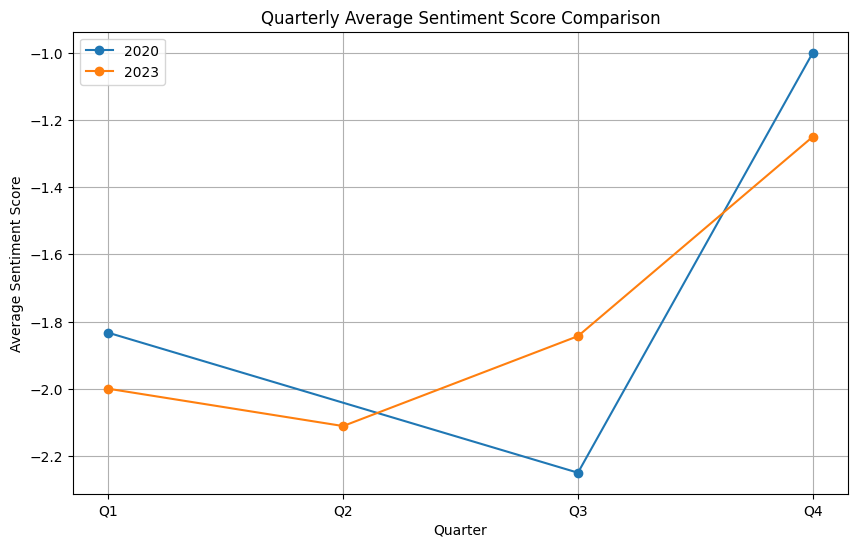

In [27]:
# 그래프 출력 함수
import matplotlib.pyplot as plt
def plot_quarterly_sentiment(detailed_stats_2020, detailed_stats_2023):
    plt.figure(figsize=(10, 6))

    for year, data in zip([2020, 2023], [detailed_stats_2020, detailed_stats_2023]):
        data_sorted = data.sort_values("quarter")
        data_sorted['quarter_numeric'] = data_sorted['quarter'].str.extract('(\d)$').astype(int)
        plt.plot(data_sorted['quarter_numeric'], data_sorted["mean"], marker='o', label=f"{year}")

    plt.xlabel("Quarter")
    plt.ylabel("Average Sentiment Score")
    plt.title("Quarterly Average Sentiment Score Comparison")
    plt.legend()
    plt.grid(True)
    plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
    plt.show()

# 그래프 출력
plot_quarterly_sentiment(detailed_stats_2020, detailed_stats_2023)